In [1]:
using CSV, DataFrames
using CairoMakie

## Par dep article ready plots

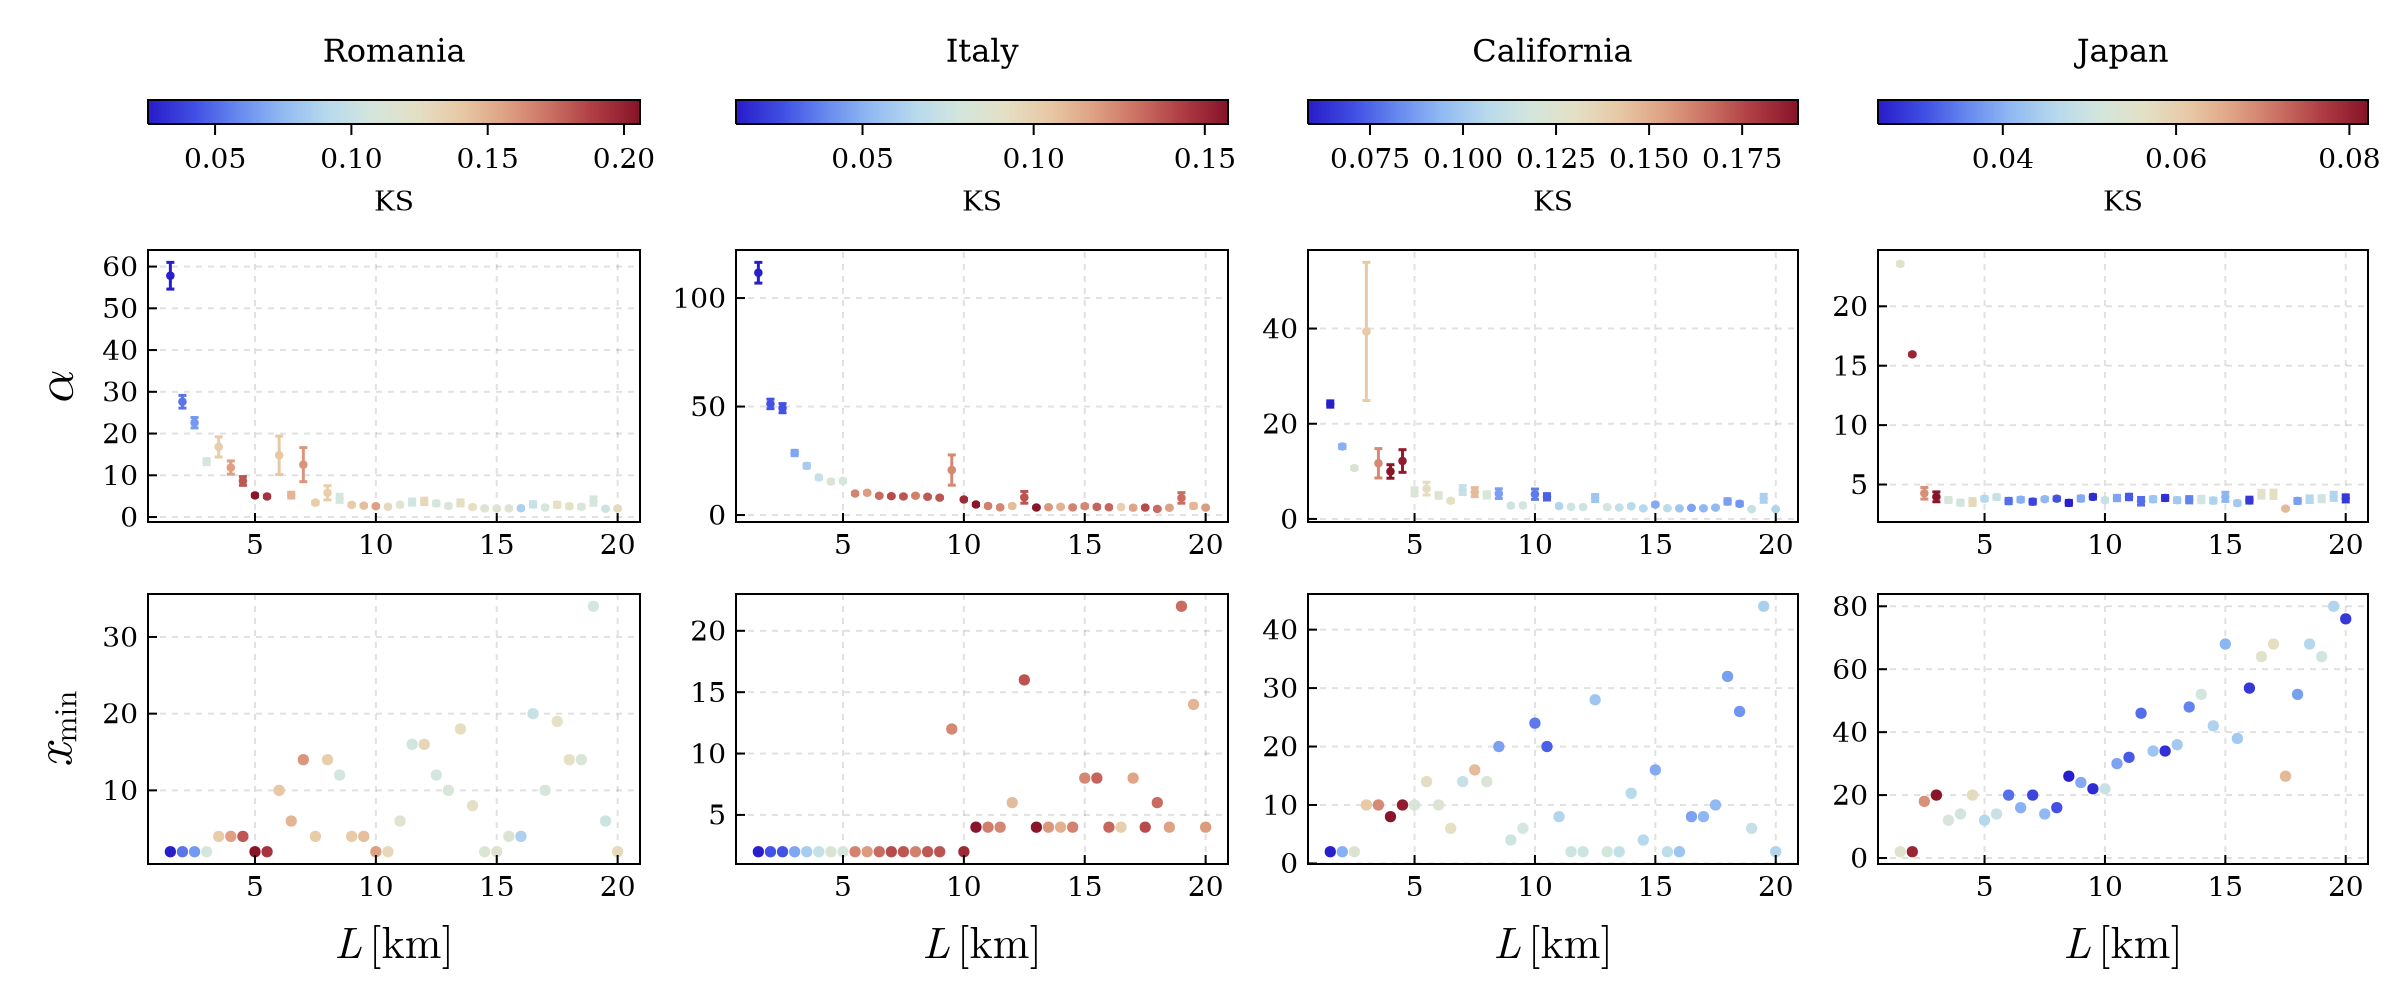

In [10]:
region="Romania"
magnitude_threshold = 4.0;
results = CSV.read("./results/$region/$(region)_minmag_$(magnitude_threshold)_alpha_xmin_dependency_cell_size.csv", DataFrame);
deleteat!(results, [1,2])

# This is inefficient, should use makie layouts. Maybe sometimes later

# Set global latex font
set_theme!(Theme(fonts=(; regular="CMU Serif")))
# Color gradient
# custom_cgrad = cgrad([:blue , :red],[0.2,0.6])
cmap = :thermometer

# Initialize figure
fig = Figure(size = (1200, 500), font= "CMU Serif", title = region) ## probably you need to install this font in your system
# y labels, just for left figure. x labels
xlabels = ["","", L"L\,\text{[km]}"]
ylabels = ["",L"\alpha", L"x_{\mathrm{min}}"]

# First column figure
ax = [Axis(fig[i, 1], xlabel = xlabels[i], ylabel = ylabels[i], ylabelsize = 26,
    xlabelsize = 22, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
    xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10) for i in 2:3]
sc = scatter!(ax[1],results.cell_size, results.alpha; color = results.KS, colormap = cmap, 
    markersize = 6, marker = :circle, strokewidth = 0)

err = errorbars!(ax[1], results.cell_size, results.alpha, results.sigma; color = results.KS, colormap = cmap, 
    whiskerwidth = 4)

xmin_scat = scatter!(ax[2],results.cell_size, results.xmin; color = results.KS, colormap = cmap, 
    markersize = 8, marker = :circle, strokewidth = 0)
cbar = Colorbar(fig[1,1], xmin_scat, vertical = false, label="KS", flipaxis=false)
Label(fig[1, 1, Top()], region, fontsize=16,
        padding=(0, 0, 15, 0))

# Columns 2,3,4 figures
for (j,region) in zip(2:4,[ "Italy", "California", "Japan"])
    results = CSV.read("./results/$region/$(region)_minmag_$(magnitude_threshold)_alpha_xmin_dependency_cell_size.csv", DataFrame);
    deleteat!(results, [1,2])
    # Just x label
    xlabels = ["","", L"L\,\text{[km]}"]
    ax = [Axis(fig[i, j], xlabel = xlabels[i], ylabelsize = 26,
        xlabelsize = 22, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
        xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10) for i in 2:3]
    sc = scatter!(ax[1],results.cell_size, results.alpha; color = results.KS, colormap = cmap, 
        markersize = 6, marker = :circle, strokewidth = 0)

    err = errorbars!(ax[1], results.cell_size, results.alpha, results.sigma; color = results.KS, colormap = cmap, 
        whiskerwidth = 4)


    xmin_scat = scatter!(ax[2],results.cell_size, results.xmin; color = results.KS, colormap = cmap, 
        markersize = 8, marker = :circle, strokewidth = 0)
    cbar = Colorbar(fig[1,j], xmin_scat, vertical = false, label="KS", flipaxis=false)
    Label(fig[1, j, Top()], region, fontsize=16,
        padding=(0, 0, 15, 0))
end


save("./results/all_regions_minmag_$(magnitude_threshold)_alpha_xmin_dependency_cell_size_KS_sigma.png", fig, px_per_unit=7)
save("./results/all_regions_minmag_$(magnitude_threshold)_alpha_xmin_dependency_cell_size_KS_sigma.pdf", fig)


fig

## Parameter dependency Analysis

In [11]:
region="Romania"
magnitude_threshold = 1.0;

In [12]:
# Analysis of parameter dependency. Based on minimum KS, proper alpha and minimum xmin
function parameter_dependency_analysis(region, magnitude_threshold)
    results = CSV.read("./results/$region/$(region)_minmag_$(magnitude_threshold)_alpha_xmin_dependency_cell_size.csv", DataFrame);

    # Eliminate records if alpha is not in range [1.5,3.5]

    results_filter_alpha = results[(results.alpha .> 1.7) .& (results.alpha .< 3.2), :];

    # Sort by KS and keep first 10 only
    results_sorted_KS = sort!(results_filter_alpha, [:KS])
    results_filter_alpha_sorted_KS = first(results_sorted_KS, 10)

    # Sort by xmin and keep first 7 only
    results_filter_alpha_sorted_KS_sorted_xmin = sort!(results_filter_alpha_sorted_KS, [:xmin])
    best_fits_region = first(results_filter_alpha_sorted_KS_sorted_xmin, 7) 
    return(best_fits_region)
end

parameter_dependency_analysis (generic function with 1 method)

In [13]:
###########################################################################################################################

df = DataFrame([[0,0,0,0,0,0,0]],["par_dep"])
for region in ["Romania","California","Italy","Japan"]
    par_dep_best_fits = DataFrame([[0,0,0,0,0,0,0]],[region])
    best_fits = parameter_dependency_analysis(region, magnitude_threshold)
    par_dep_best_fits = hcat(par_dep_best_fits, best_fits)
    df = hcat(df, par_dep_best_fits, makeunique=true)
end

###########################################################################################################################

In [14]:
df

Row,par_dep,Romania,cell_size,alpha,sigma,xmin,KS,California,cell_size_1,alpha_1,sigma_1,xmin_1,KS_1,Italy,cell_size_2,alpha_2,sigma_2,xmin_2,KS_2,Japan,cell_size_3,alpha_3,sigma_3,xmin_3,KS_3
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64
1,0,0,3.5,3.05335,0.131994,24.0,0.039392,0,4.0,1.72569,0.00687001,8.0,0.0443254,0,4.0,2.04165,0.0142451,14.0,0.0141486,0,4.5,2.22981,0.0102123,38.0,0.0202991
2,0,0,4.0,3.03845,0.124056,26.0,0.0282478,0,5.0,1.70493,0.00934602,16.0,0.0451559,0,4.5,2.01688,0.0150127,16.0,0.0135754,0,4.0,2.2818,0.0121021,46.0,0.0197211
3,0,0,4.5,3.09571,0.143596,34.0,0.0218677,0,6.0,1.70476,0.0123489,30.0,0.0514118,0,5.5,1.98558,0.0184454,24.0,0.0110782,0,6.0,2.22887,0.0146533,78.0,0.0218382
4,0,0,10.0,2.28238,0.0647699,34.0,0.0417363,0,1.5,3.12604,0.0598234,106.0,0.0257749,0,5.0,1.99993,0.0203433,30.0,0.0149903,0,7.5,2.18633,0.0155532,98.0,0.0216579
5,0,0,5.5,3.02054,0.150603,46.0,0.0279106,0,2.0,2.99495,0.0708426,184.0,0.0356928,0,6.0,1.98465,0.0211715,32.0,0.0120155,0,5.5,2.31252,0.0212138,128.0,0.0216772
6,0,0,5.0,3.13217,0.211116,58.0,0.0342487,0,3.5,2.75299,0.0797639,412.0,0.042868,0,7.0,2.00337,0.0274716,54.0,0.0155215,0,2.0,2.85571,0.0482369,134.0,0.0164293
7,0,0,6.0,3.10805,0.211867,72.0,0.0419068,0,4.5,2.80405,0.109186,744.0,0.044013,0,7.5,2.01223,0.028909,60.0,0.0138499,0,1.5,3.03015,0.0762977,152.0,0.0152634


In [15]:
magnitude_threshold = 2.0;

###########################################################################################################################

df = DataFrame([[0,0,0,0,0,0,0]],["par_dep"])
for region in ["Romania","California","Italy","Japan"]
    par_dep_best_fits = DataFrame([[0,0,0,0,0,0,0]],[region])
    best_fits = parameter_dependency_analysis(region, magnitude_threshold)
    par_dep_best_fits = hcat(par_dep_best_fits, best_fits)
    df = hcat(df, par_dep_best_fits, makeunique=true)
end

###########################################################################################################################

In [16]:
df

Row,par_dep,Romania,cell_size,alpha,sigma,xmin,KS,California,cell_size_1,alpha_1,sigma_1,xmin_1,KS_1,Italy,cell_size_2,alpha_2,sigma_2,xmin_2,KS_2,Japan,cell_size_3,alpha_3,sigma_3,xmin_3,KS_3
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64
1,0,0,15.0,1.99965,0.0460615,14.0,0.0394183,0,4.0,1.94545,0.00987098,4.0,0.0533402,0,8.0,2.19407,0.0220633,10.0,0.0243744,0,2.0,3.09091,0.0593779,44.0,0.0209044
2,0,0,13.5,2.06225,0.050412,16.0,0.0352162,0,5.5,1.84279,0.0145418,10.0,0.0436548,0,7.0,2.22753,0.0374392,24.0,0.0187491,0,2.5,3.0506,0.0689302,66.0,0.0176546
3,0,0,14.5,1.99509,0.0484977,16.0,0.0374501,0,5.0,1.8734,0.0144586,10.0,0.0501704,0,6.5,2.21414,0.0373626,24.0,0.0214911,0,5.5,2.58244,0.0330321,68.0,0.0249536
4,0,0,10.0,2.18964,0.0569733,18.0,0.0433158,0,6.0,1.87261,0.0190284,18.0,0.0457535,0,7.5,2.19649,0.0379694,26.0,0.0201735,0,7.0,2.50164,0.0319932,80.0,0.0250634
5,0,0,13.0,2.09256,0.0536966,18.0,0.0459598,0,3.0,2.31199,0.0296576,28.0,0.0497868,0,11.5,2.14952,0.048064,48.0,0.0185928,0,4.0,2.86814,0.0543607,86.0,0.0213306
6,0,0,15.5,2.00074,0.0514047,18.0,0.0468854,0,6.5,1.91351,0.0243107,30.0,0.0465267,0,12.0,2.14943,0.0509978,54.0,0.0221419,0,3.0,3.023,0.0862609,102.0,0.023777
7,0,0,16.0,2.01087,0.0569562,22.0,0.0417398,0,7.0,1.87382,0.0239515,30.0,0.04963,0,12.5,2.16409,0.0558139,64.0,0.0244579,0,5.0,2.86075,0.0679902,136.0,0.0199665


In [17]:
magnitude_threshold = 3.0;

###########################################################################################################################

df = DataFrame([[0,0,0,0,0,0,0]],["par_dep"])
for region in ["Romania","California","Italy","Japan"]
    par_dep_best_fits = DataFrame([[0,0,0,0,0,0,0]],[region])
    best_fits = parameter_dependency_analysis(region, magnitude_threshold)
    par_dep_best_fits = hcat(par_dep_best_fits, best_fits)
    df = hcat(df, par_dep_best_fits, makeunique=true)
end

###########################################################################################################################

In [18]:
df

Row,par_dep,Romania,cell_size,alpha,sigma,xmin,KS,California,cell_size_1,alpha_1,sigma_1,xmin_1,KS_1,Italy,cell_size_2,alpha_2,sigma_2,xmin_2,KS_2,Japan,cell_size_3,alpha_3,sigma_3,xmin_3,KS_3
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64
1,0,0,16.5,2.27603,0.0722412,2.0,0.0735025,0,12.5,1.8461,0.029351,4.0,0.0566644,0,19.0,2.39827,0.0630388,8.0,0.0359472,0,19.5,2.1621,0.0239265,28.0,0.0411501
2,0,0,19.0,2.3201,0.0798958,2.0,0.0788127,0,13.0,1.8045,0.0289547,4.0,0.0607213,0,12.5,2.43247,0.0689997,8.0,0.0373102,0,4.0,3.16826,0.0922037,32.0,0.0273483
3,0,0,18.5,2.31941,0.0787095,2.0,0.0801859,0,14.5,1.76635,0.0290903,4.0,0.0621517,0,14.5,2.42989,0.0770944,10.0,0.0323808,0,5.0,3.14806,0.0884343,38.0,0.0267751
4,0,0,20.0,2.26586,0.0797414,2.0,0.0813793,0,13.5,1.80368,0.0337812,6.0,0.0522884,0,17.5,2.32953,0.0712704,10.0,0.0370801,0,5.5,3.16371,0.0806929,38.0,0.0279594
5,0,0,19.5,2.31305,0.0802071,2.0,0.0856929,0,12.0,1.87365,0.0342939,6.0,0.0530392,0,11.0,2.37044,0.0784711,10.0,0.038272,0,6.0,3.16473,0.0860403,44.0,0.0267168
6,0,0,17.5,2.29068,0.0756611,2.0,0.0862513,0,16.5,1.71959,0.0340738,6.0,0.0586279,0,15.0,2.3625,0.0840156,12.0,0.0294601,0,7.0,2.98094,0.0718562,44.0,0.0336393
7,0,0,17.0,2.26473,0.0736354,2.0,0.0877252,0,8.5,2.01517,0.0392781,8.0,0.0611796,0,14.0,2.38116,0.0846841,12.0,0.0387713,0,9.5,2.86534,0.0617676,50.0,0.0339576


In [20]:
magnitude_threshold = 4.0;

###########################################################################################################################

df = DataFrame([[0,0,0,0,0,0,0]],["par_dep"])
for region in ["Romania","California","Italy","Japan"]
    par_dep_best_fits = DataFrame([[0,0,0,0,0,0,0]],[region])
    best_fits = parameter_dependency_analysis(region, magnitude_threshold)
    par_dep_best_fits = hcat(par_dep_best_fits, best_fits)
    df = hcat(df, par_dep_best_fits, makeunique=true)
end

###########################################################################################################################

ArgumentError: ArgumentError: New columns must have the same length as old columns

In [ ]:
df